# 14 Queue

stack처럼 data element를 보관할 수 있는 선형구조이다. 

하지만 FIFO다. 

넣는 것을 enqueue, 빼는 것을 dequeue라고 부른다. 

## 연산의 정의

- `size()`: 큐 안의 원소 갯수
- `isEmpty()`: 비어있는지
- `enqueue(x)`: 데이터 원소 x를 추가
- `dequeue()`: 큐에서 제일 앞 원소 제거 
- `peek()`: 큐의 맨 앞 원소 확인

In [1]:
class ArrayQueue:
    def size(self):
        return len(self.data)
    
    def isEmpty(self):
        return self.size() == 0
    
    def enqueue(self, item):
        self.data.append(item)
    
    def dequeue(self):
        return self.data.pop(0)
    
    def peek(self):
        return self.data[0]

배열로 큐를 구현할 경우 

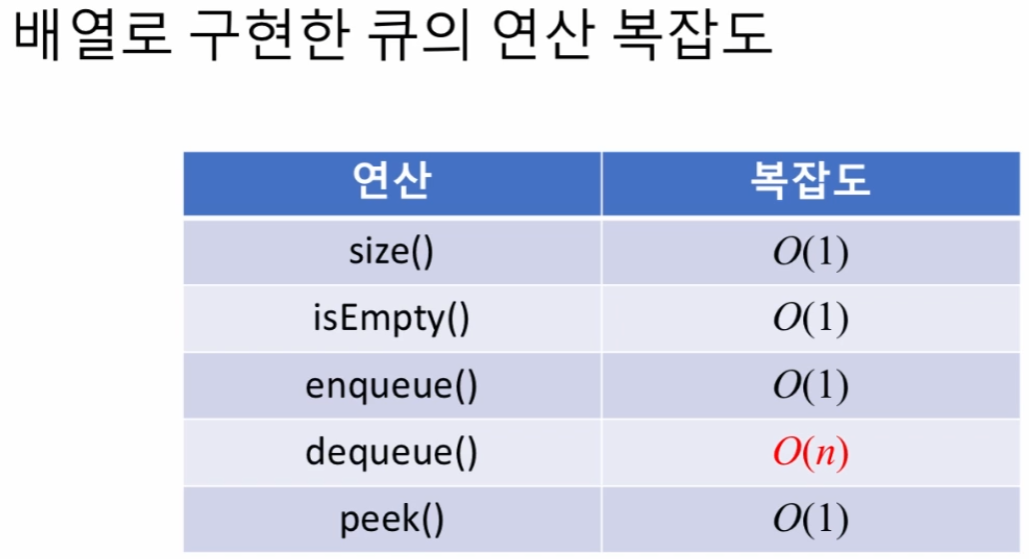

`dequeue()`가 **O(n)** 이 되는 이유는 맨 앞의 원소를 제거한 다음 나머지 원소들을 다 한 칸씩 옮겨 채워넣어줘야 하기 때문이다. 

따라서 이를 이중연결리스트로 구현하면 **O(1)** 을 가지도록 할 수 있다. 

# 15 Circular Queue

큐는 어디에 이용되는가? 

- 자료를 생성하는 작업과 그 자료를 이용하는 작업이 비 동기적으로 (asynchronously) 일어나는 경우 
- 자료를 생성하는 작업이 n명에게 이뤄지고 자료를 이용하는 작업이 m명에게 이뤄지는 경우
- 컴퓨터 시스템 내에서 자료를 처리해서 새로운 자료를 생성하고 나중에 그 자료를 또 처리해야 하는 작업의 경우. 
    - 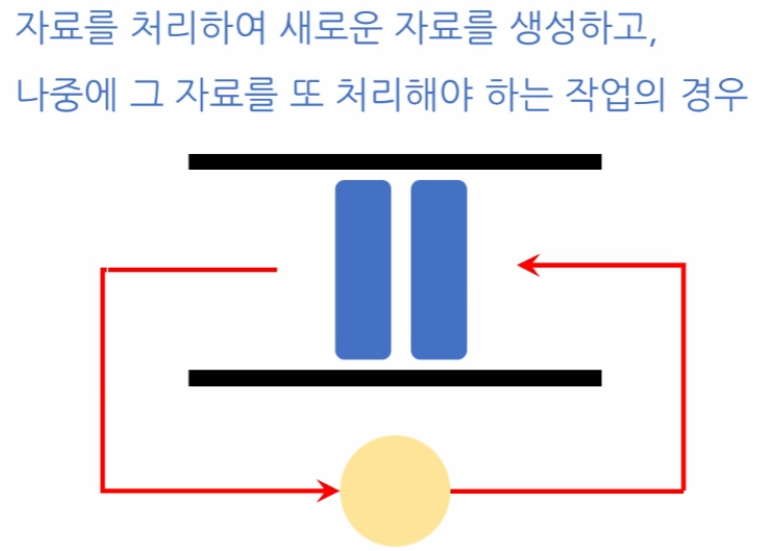
    - 네트워크 스케쥴링, 운영체제 등에 쓰이는 것

circular queue는 정해진 개수의 저장공간을 빙 돌려가며 이용한다. 

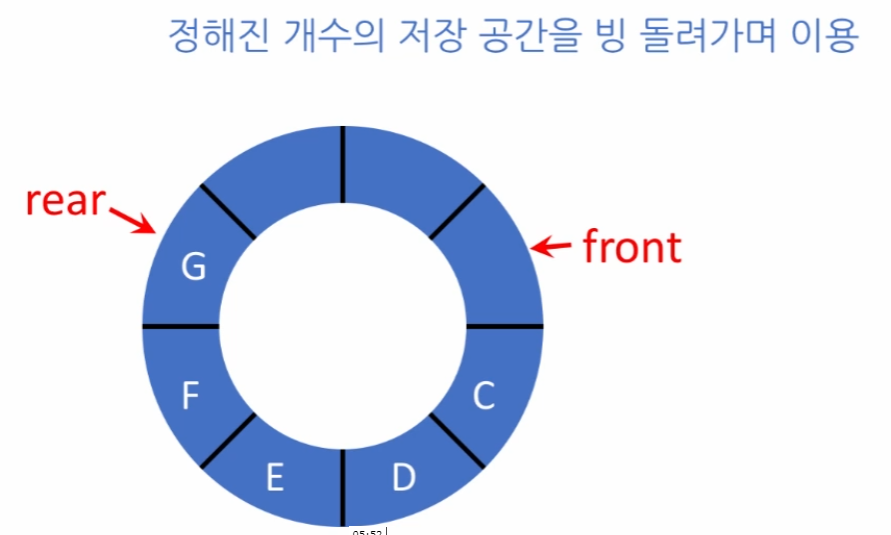

원래 큐는 무한정 데이터를 넣을 수 있지만 실제로 자원은 유한하기 때문에 큐의 길이를 제한한다. 이처럼 circular queue 에서도 큐가 가득 차면 더 이상 원소를 넣을 수 없다. 따라서 큐의 길이를 계속 기억하고 있어야 한다. 

## 연산의 정의

아래 사항만 추가된다. 

- `isFull()`: 큐에 데이터 원소가 꽉 차있는지 판단. 

이를 배열을 이용해 list로 구현할 경우 정해진 길이의 리스트를 확보한 다음 처리한다. 

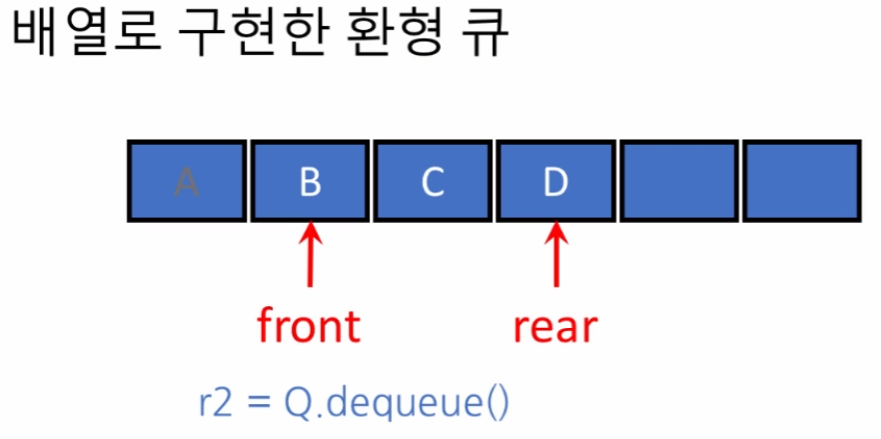

이런 식으로 배열 마지막까지 가면 rear을 앞으로 가져와 환형 큐처럼 돌린다. 

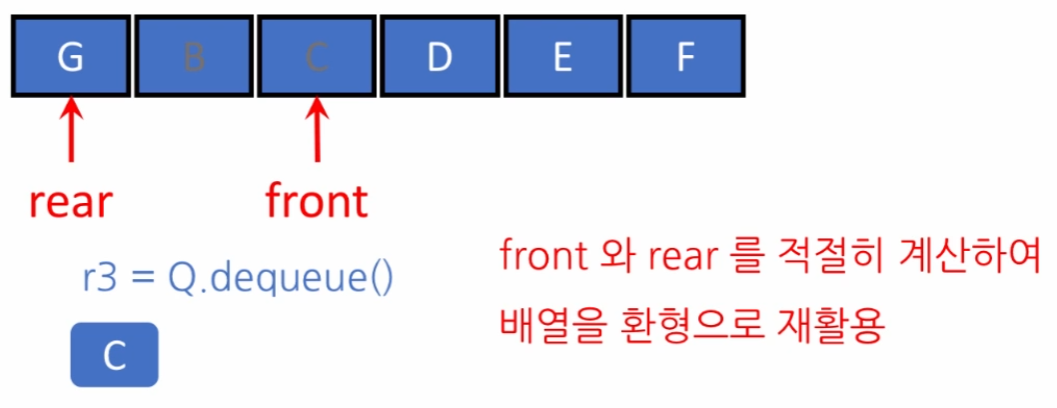

여기서 적절히 rear을 앞으로 가져온다는 것은 `maxCount`의 길이로 나눠 나머지 연산을 하면 구현할 수 있다 .

#### 연습문제 


In [5]:
class CircularQueue:

    def __init__(self, n):
        self.maxCount = n
        self.data = [None] * n
        self.count = 0
        self.front = -1
        self.rear = -1

    def size(self):
        return self.count

    def isEmpty(self):
        return self.count == 0

    def isFull(self):
        return self.count == self.maxCount

    def enqueue(self, x):
        if self.isFull():
            raise IndexError('Queue full')
        self.rear = (self.rear + 1) % self.maxCount

        self.data[self.rear] = x
        self.count += 1

    def dequeue(self):
        if self.isEmpty():
            raise IndexError('Queue empty')
        self.front = (self.front + 1) % self.maxCount

        x = self.data[self.front]

        self.count -= 1
        return x

    def peek(self):
        if self.isEmpty():
            raise IndexError('Queue empty')
        return self.data[(self.front+1) % self.maxCount]
    
    def solution(x):
        return 0

# 16 Priority Queue

FIFO가 아니라 데이터 원소들의 우선순위에 따라 dequeue로 빠져나온다. 

예) 운영체제의 CPU 스케줄러. 우선순위가 높은 작업을 먼저 꺼낸다. 

구현을 위해선 

1. enqueue할 때 우선순위 순서를 유지해서 집어넣는 방법
2. dequeue할 때 우선순위 높은 것을 선택하는 방법

여기서 1 번이 더 유리하다. 우선순위 순서를 유지해서 집어넣는 것은 새로운 n번째 원소를 집어넣을 때 모두 search 하지 않아도 되기 때문이다. 

그런데 정리 안하고 넣어서 선택할 떄 찾으려고 하면 다 찾아야 한다. 

1. 선형 배열 이용
2. 연결 리스트 이용

연결리스트가 시간 복잡도 면에선 더 유리한데, 공간 복잡도 면에선 배열이 유리하다. 

하지만 주로 시간복잡도가 우선된다. 

원소를 추가할 때 우선순위에 따른 알맞은 자리를 찾아서 정렬된 형태로 유지해 두고 꺼낼 때 한 쪽 끝에서 꺼낼 수 있도록 코드를 만들어봅니다. 이렇게 하면, 원소를 넣는 (enqueue) 연산의 복잡도는 O(n) 으로서 큐의 길이에 비례하고, 원소를 꺼내는 (dequeue) 연산의 복잡도는 O(1) 로서 상수 시간, 즉 데이터 원소의 개수에 무관한 시간이 걸립니다. 실제 코드를 보면서 (빈칸 채우기 연습문제입니다) 정말 그런지 확인해보시기 바랍니다.

In [2]:
class Node:

    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None


class DoublyLinkedList:

    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None


    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'

        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s


    def getLength(self):
        return self.nodeCount


    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result


    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result


    def getAt(self, pos):
        if pos < 0 or pos > self.nodeCount:
            return None

        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1

        return curr


    def insertAfter(self, prev, newNode):
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True


    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False

        prev = self.getAt(pos - 1)
        return self.insertAfter(prev, newNode)


    def popAfter(self, prev):
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data


    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            return None

        prev = self.getAt(pos - 1)
        return self.popAfter(prev)


    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail

        self.nodeCount += L.nodeCount


class PriorityQueue:

    def __init__(self):
        self.queue = DoublyLinkedList()


    def size(self):
        return self.queue.getLength()

    def isEmpty(self):
        return self.size() == 0

    def enqueue(self, x): 
        newNode = Node(x)
        curr = self.queue.head # 빈칸 1

        while curr.next is not self.queue.tail and curr.next.data > newNode.data: # 빈칸 2
            curr = curr.next
        self.queue.insertAfter(curr, newNode) # 빈칸 3

    def dequeue(self):
        return self.queue.popAt(self.queue.getLength())

    def peek(self):
        return self.queue.getAt(self.queue.getLength()).data


def solution(x):
    return 0